In [2]:
# 1. 导入需要的模块和库
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# 2. 导入数据，探索数据
data = pd.read_csv(r"H:\学习小分队\data\digit recognizor.csv") 

In [4]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

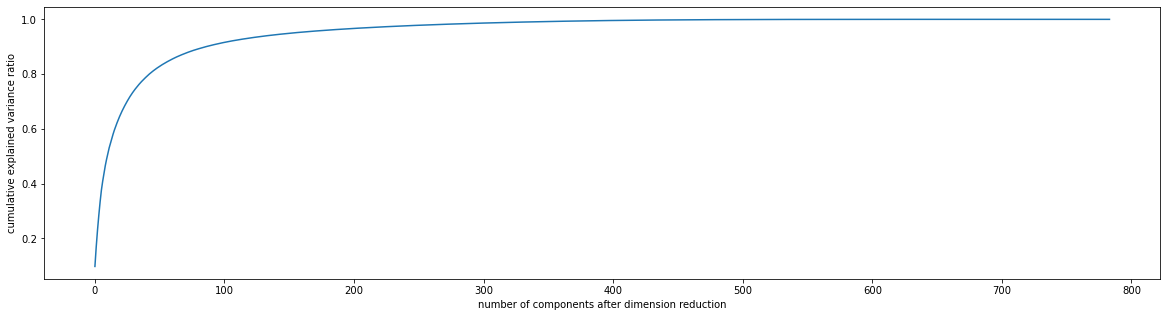

In [6]:
# 3. 画累计方差贡献率曲线，找最佳降维后维度的范围
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

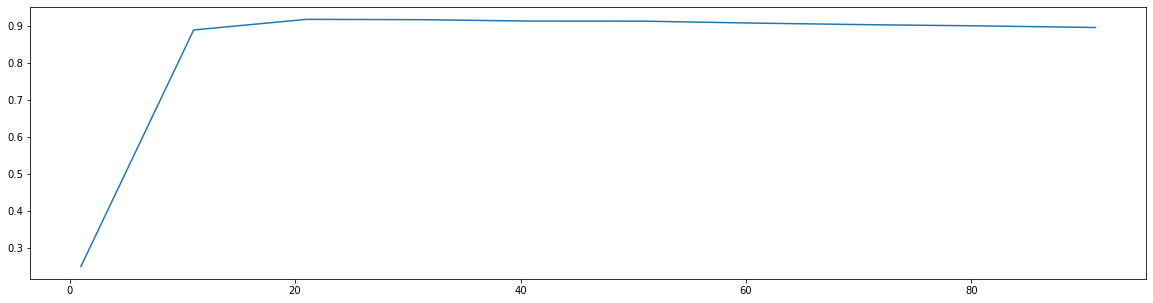

In [13]:
# 4. 降维后维度的学习曲线，继续缩小最佳维度的范围
#======【TIME WARNING：2mins 30s】======#
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                            ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

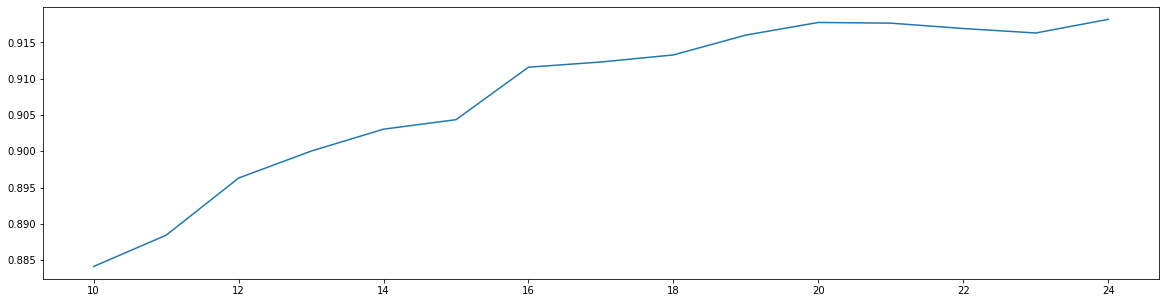

In [14]:
# 5. 细化学习曲线，找出降维后的最佳维度
#======【TIME WARNING：2mins 30s】======#
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [16]:
# 6. 导入找出的最佳维度进行降维，查看模型效果
X_dr = PCA(24).fit_transform(X)
#======【TIME WARNING:1mins 30s】======#
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

0.9465

In [17]:
# 7. 突发奇想，特征数量已经不足原来的3%，换模型怎么样？
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,y,cv=5).mean()

0.970404761904762

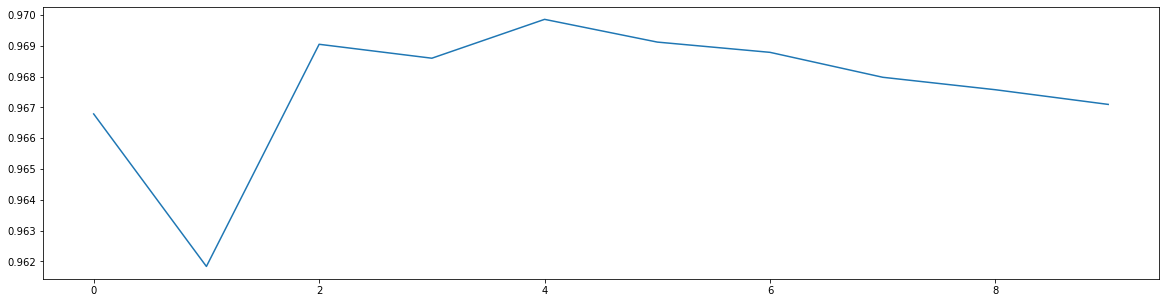

In [19]:
X_dr = PCA(23).fit_transform(X)
# 8. KNN的k值学习曲线
#======【TIME WARNING: 】======#
score = []
for i in range(10):
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

In [22]:
# 9. 定下超参数后，模型效果如何，模型运行时间如何？
cross_val_score(KNN(5),X_dr,y,cv=5).mean()

0.9698571428571429

In [24]:
#=======【TIME WARNING: 3mins】======#
# %%timeit
cross_val_score(KNN(5),X_dr,y,cv=5).mean()

0.9698571428571429